### Efficient Frontier (Modern Portfolio Theory - Markowitz)
$\textbf{So what?}$
* Determine portfolio weights(%) @ minimimum point to minimise risk and maximise returns

$\textbf{Key Takeaways}$
1. Efficient frontier comprises investment portfolios that offer the highest expected return for a specific level of risk.
2. Returns are dependent on the investment combinations that make up the portfolio.
3. The standard deviation of a security is synonymous with risk. Lower covariance between portfolio securities results in lower portfolio standard deviation.
4. Successful optimization of the return versus risk paradigm should place a portfolio along the efficient frontier line.
5. Optimal portfolios that comprise the efficient frontier tend to have a higher degree of diversification.

$\textbf{Limitations}$ <br>
Markowitz posits several assumptions in his theory, such as that 
1. investors are rational and avoid risk when possible; 
2. there are not enough investors to influence market prices; and 
3. investors have unlimited access to borrowing and lending money at the risk-free interest rate. 

However, reality proves that the market includes irrational and risk-seeking investors, there are large market participants who could influence market prices(*Nation states), and there are investors who do not have unlimited access to borrowing and lending money.

* What are these players that make up this market percentage?

https://www.investopedia.com/terms/e/efficientfrontier.asp

$\textbf{Methodologys}$

using n simulation of weights to for data collection

$\textbf{Work on}$
1. How to determine the weights along the derived frontier?

### 1. Package import and data import

#### Variables

1. 2 tickers, more can be added
2. Data Source: 'Yahoo'
3. Data used for returns: 'Adj close', adjusted closing price
4. Data range: from '2010-1-1' to today


In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline 

#'%matplotlib inline 'facilitates plotting matplotlib graphs just below code cells and storing them in the notebook document
#initialise tickers
ticker_1 = 'PG'
ticker_2 = '^GSPC'
ticker_3 = 'PFE'
ticker_4 = 'XOM'

assets = [ticker_1, ticker_2, ticker_3, ticker_4]
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2010-1-1')['Adj Close']

##### Normalise data to visualise growth & Calculate log returns

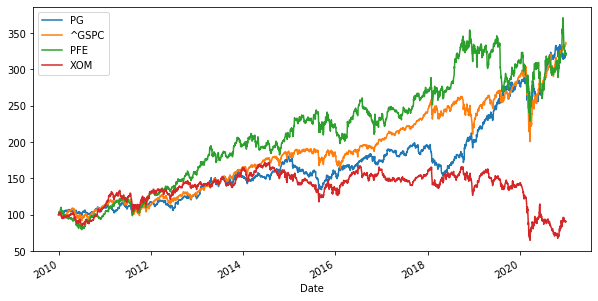

In [2]:
#Normalise data to visualise growth, why?
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

#Calculate log returns
log_returns = np.log(pf_data / pf_data.shift(1))
lr_mean_a = log_returns.mean() * 250
lr_cov_a = log_returns.cov() * 250
lr_corr = log_returns.corr()


#### Assign random weights using a numpy array for n objects

In [3]:
#random weights using a numpy array for n objects
num_assets = len(assets) #check print(num_assets)

weights = np.random.random(num_assets)
weights /= np.sum(weights) #print(weights) #print(weights[0]+weights[1])

#### Expected Portfolio Return (See portfolio risk):

sum of the weighted annualised log returns. This is a n-dimension object, requires numpy

In [4]:
#np.sum(weights * log_returns.mean()) * 250

#### Expected Portfolio Variance ($\sigma^2$) (See portfolio risk):

 This is a n-dimension object, requires linear algebra for square of dot product
 
 $$
\sigma^2 = (w\cdot Cov)^2 = w^T \cdot Cov \cdot w
$$

In [5]:
#np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

#### Expected Portfolio Volatility ($\sigma$) (See portfolio risk):

In [6]:
#np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

#### Simulation of n-random generated weight combination of m-assets

let n = 1000
example m = 2 (P&G and S&P500)

In [10]:
pfolio_returns = [] #empty list for randomly generated weighted returns
pfolio_volatilities = [] #empty list for randomly generated weighted volatalities = std deviations

for x in range (100000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
#Generate array with data of return and volatalities from lists generated with random generated weights
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.0997269 , 0.05704932, 0.08389146, ..., 0.05861588, 0.10268308,
        0.06443985]),
 array([0.15670814, 0.18332535, 0.16971707, ..., 0.18121026, 0.15756885,
        0.16067889]))

In [11]:
#Create dataframe object with 2 columns as a dictionary keys-array pairs :'Return' & 'pfolio_returns', 'Volatility' & pfolio_volatilities'
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

Text(0, 0.5, 'Expected Return')

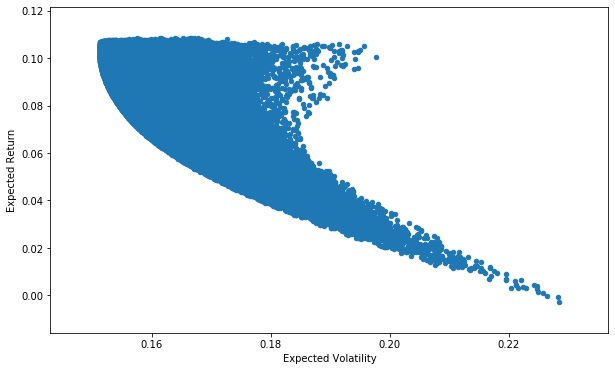

In [12]:
#Plot dataframe into a scatter plot
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

How do i find the 